In [2]:
import os, shutil
original_dataset_dir = 'E:\\train'
base_dir = 'E:\\cats_and_dogs_small'
os.mkdir(base_dir)

In [3]:
train_dir = os.path.join(base_dir,'train')
os.mkdir(train_dir)

In [4]:
validation_dir = os.path.join(base_dir,'validation')
os.mkdir(validation_dir)

In [5]:
test_dir = os.path.join(base_dir,'test')
os.mkdir(test_dir)

In [6]:
train_cats_dir = os.path.join(train_dir,'cats')
os.mkdir(train_cats_dir)

In [7]:
train_dogs_dir = os.path.join(train_dir,'dogs')
os.mkdir(train_dogs_dir)

In [8]:
validation_dogs_dir = os.path.join(validation_dir,'dogs')
os.mkdir(validation_dogs_dir)

In [9]:
validation_cats_dir = os.path.join(validation_dir,'cats')
os.mkdir(validation_cats_dir)

In [10]:
test_dogs_dir = os.path.join(test_dir,'dogs')
os.mkdir(test_dogs_dir)

In [11]:
test_cats_dir = os.path.join(test_dir,'cats')
os.mkdir(test_cats_dir)

In [12]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [13]:
# setting the validation data equal to 500
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(validation_cats_dir,fname)
    shutil.copyfile(src,dst)

In [14]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(test_cats_dir,fname)
    shutil.copyfile(src,dst)

In [15]:
#setting the training data to 1000 pictures
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
#setting the validation data equal to 500 sample
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
# setting test data equal to 500 samples
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [17]:
from keras import layers
from keras import models


Using TensorFlow backend.


In [18]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))


In [19]:
from keras import optimizers
# we use binary_crossentropy as we only have two casses here
model.compile(loss='binary_crossentropy',
             optimizer = optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [20]:
from keras.preprocessing.image import ImageDataGenerator
# setting the data of the images between 0 and 1
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
# batch size is the number of samples running at a time
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150,150) ,batch_size=20,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150,150), batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [21]:
# We have to check that data and labels are having the same shape
for data_batch,labels_batch in train_generator:
    print('data batch shape is',data_batch.shape)
    print('labels batch shape is',labels_batch.shape)
    break

data batch shape is (20, 150, 150, 3)
labels batch shape is (20,)


In [22]:
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,validation_steps=50)


Epoch 1/30
100/100 [==============================] - 77s 766ms/step - loss: 0.6944 - acc: 0.5205 - val_loss: 0.7199 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 77s 773ms/step - loss: 0.6588 - acc: 0.6075 - val_loss: 0.7148 - val_acc: 0.5320
Epoch 3/30
100/100 [==============================] - 78s 780ms/step - loss: 0.6242 - acc: 0.6665 - val_loss: 0.6243 - val_acc: 0.6550
Epoch 4/30
100/100 [==============================] - 76s 763ms/step - loss: 0.5797 - acc: 0.7110 - val_loss: 0.5917 - val_acc: 0.6830
Epoch 5/30
100/100 [==============================] - 77s 770ms/step - loss: 0.5334 - acc: 0.7310 - val_loss: 0.5993 - val_acc: 0.6670
Epoch 6/30
100/100 [==============================] - 77s 766ms/step - loss: 0.5003 - acc: 0.7560 - val_loss: 0.5933 - val_acc: 0.6870
Epoch 7/30
100/100 [==============================] - 78s 784ms/step - loss: 0.4771 - acc: 0.7740 - val_loss: 0.5766 - val_acc: 0.6950
Epoch 8/30
100/100 [==============================] - 7

In [23]:
model.save('cats_and_dogs_small_2.h5')

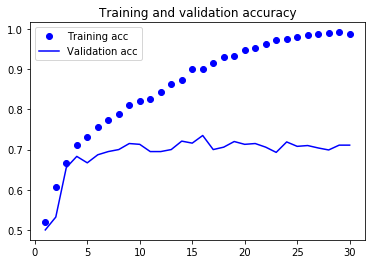

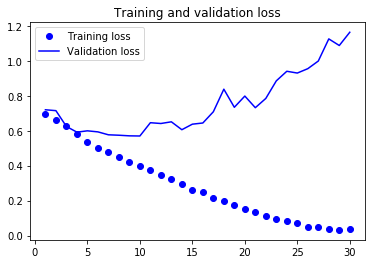

In [25]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [26]:
# we realize here that the accuracy stops improving after 7th epoch
# so we will use data augmentation to mitigate overfitting
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

In [ ]:
# building a new model and this new model will include dropout to overcome overfitting
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [ ]:
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=32,
class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=32,
class_mode='binary')
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=100,
validation_data=validation_generator,
validation_steps=50)

In [ ]:
model.save('cats_and_dogs_small_2.h5')